# Random Forest and Boosting Lab

In this lab we will practice using Random Forest Regressor and Boosted Trees Regressor on the Project 6 Data.

> Instructor Notes:
- This walks the students through a sample dataset, they should actually do it on the full dataset they have created as part of Project 6.
- The code for this lab is shorter than usual in order to give the students time to practice with Tableau.

## 1. Load and inspect the data

As part of your work of project 6 you should have retrieved the top 250 movies from IMDB. Conduct this lab on the data you have retrieved.

In the [asset folder](../../assets/datasets/imdb_p6_sample.csv) you can find a subset of the movies, in case you have not completed yet Project 6.

1. Load the dataset and inspect it
- Assign the rating to a y vector and the binary columns to an X feature matrix
- What would you do with the year variable?
> Answer: normalize it and use it as feature

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [84]:
from sklearn import preprocessing
from sklearn import tree
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

In [64]:
df = pd.read_csv('../../assets/datasets/imdb_p6_sample.csv')

In [65]:
df.shape

(26, 13)

In [66]:
df.head()

,HA,rating,tconst,title,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,1633889,9.3,tt0111161,The Shawshank Redemption,1994,0,1,0,1,0,0,0,1
1,1118799,9.2,tt0068646,The Godfather,1972,1,1,0,0,1,0,1,0
2,762879,9.0,tt0071562,The Godfather: Part II,1974,1,1,0,0,1,0,0,1
3,1616346,9.0,tt0468569,The Dark Knight,2008,1,1,1,0,1,0,1,1
4,835155,8.9,tt0108052,Schindler's List,1993,1,1,1,1,1,1,1,1


In [87]:
y = df['rating']
X = df.iloc[:,4:]

cv = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [93]:
def run_test(classifier, name):
    model = classifier
    score = model_selection.cross_val_score(model, X, y, cv=cv, scoring='r2')

    i = 0
    col = ['r', 'g', 'k']
    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
#         scores.append(metrics.r2_score(y_test, y_pred))
        plt.scatter(y_pred, y_test, c=col[i]);
        i+=1
    print '{} score: {}'.format(name, score.mean())

## 2. Decision Tree Regressor


1. Train a decision tree regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
    - They should align to a diagonal line.
- Add some text to the plot indicating the average $R^2$ coefficient

Decision Tree Regressor score: -3.01456507627


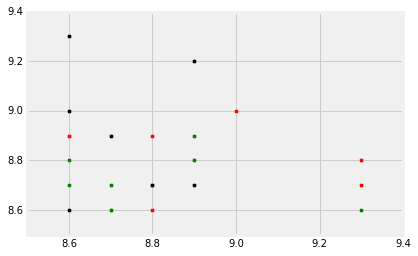

In [94]:
run_test(tree.DecisionTreeRegressor(), "Decision Tree Regressor")

## 3. Random Forest Regressor


1. Train a random forest regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- How does this plot compare with the previous one?
> Answer: points are tighter now, indicating a better fit

Random Forest Regressor score: -0.203300438596


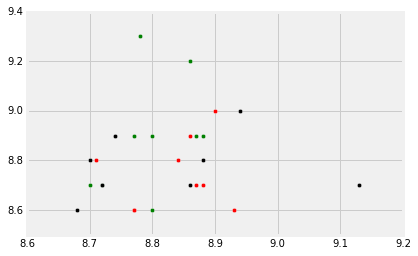

In [95]:
run_test(ensemble.RandomForestRegressor(), "Random Forest Regressor")

## 4. AdaBoost Regressor


1. Train a AdaBoost regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

Ada Boost Regressor score: -2.41336018916


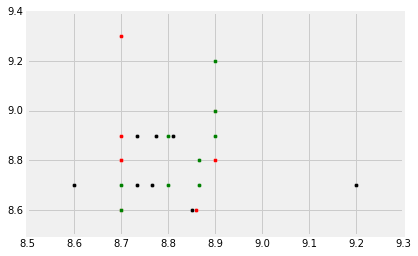

In [98]:
run_test(ensemble.AdaBoostRegressor(), 'Ada Boost Regressor')

## 4. Gradient Boosting Trees Regressor


1. Train a Gradient Boosting Trees regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

Gradient Boosting Regressor score: -2.64120914414


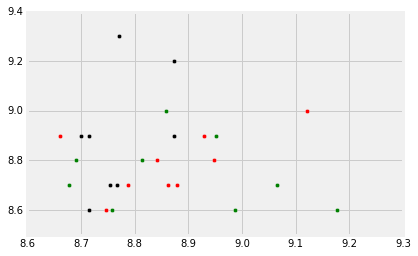

In [99]:
run_test(ensemble.GradientBoostingRegressor(), 'Gradient Boosting Regressor')

## 5. Tableau Practice

Practice using Tableau to inspect the data and also to plot the results.


## Bonus

Take the best model and try to improve it using grid search.